In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [69]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [70]:
df=df[df['species']!='setosa']

In [71]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [73]:
x=df.iloc[:,:-1]
y=df['species']

In [74]:
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,9,10,11,20,30,40,50,100],'max_iter':[100,200,300,400,500,1000]}

In [82]:
classifier_regression=GridSearchCV(lr,param_grid=parameter,scoring='accuracy',cv=5)

In [83]:
classifier_regression.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 30, 40,
                               50, 100],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [84]:
print(classifier_regression.best_params_)

{'C': 6, 'max_iter': 100, 'penalty': 'l2'}


In [85]:
print(classifier_regression.best_score_*100)

98.75


In [86]:
y_pred=classifier_regression.predict(x_test)

In [87]:
#Accuracy
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [88]:
score=accuracy_score(y_pred,y_test)
print(score*100)

90.0


In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



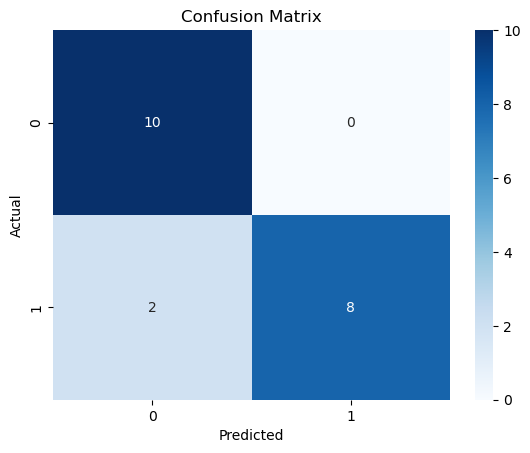

In [90]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
